   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0      0.0             0.0  
1  M2044282225             0.0             0.0      0.0             0.0  
2   C553264065             0.0             0.0      1.0             0.0  
3    C38997010         21182.0             0.0      1.0             0.0  
4  M1230701703             0.0             0.0      0.0             0.0  


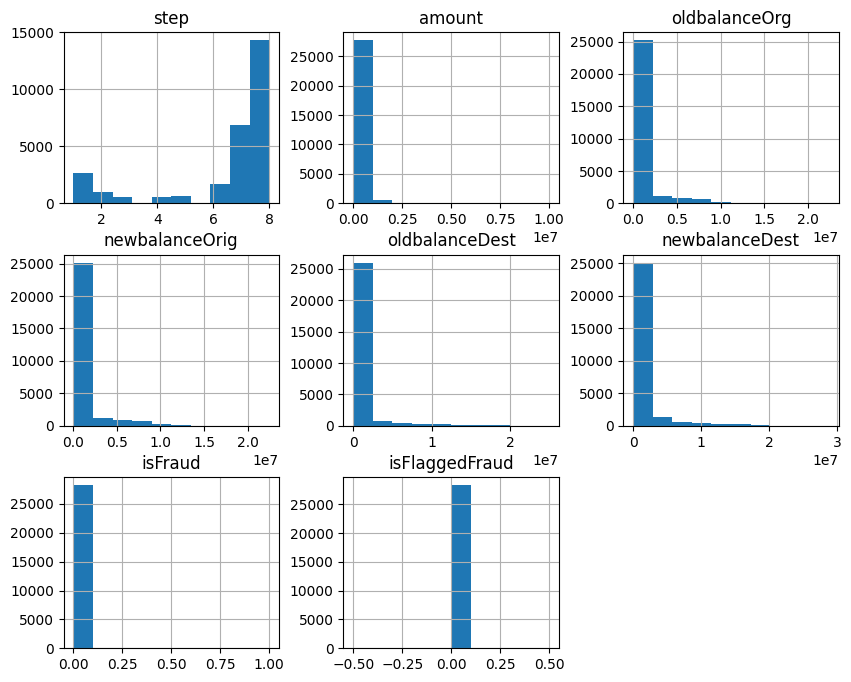

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
# Load the dataset (replace 'your_dataset.csv' with the actual dataset file)
data = pd.read_csv('/content/onlinefraud.csv')
# Display the first few rows of the dataset
print(data.head())
# Visualize the data (you can customize this based on your dataset)
data.hist(figsize=(10, 8))
plt.show()

In [ ]:
# b) Check and Replace Missing Values:
# Check for missing values
data.isnull().sum()
# Replace missing values (e.g., with the mean or median of the column)

# Calculate the mean of only numeric columns
numeric_data = data.select_dtypes(include=['number'])
data.fillna(numeric_data.mean(), inplace=True)

# Display the first few rows of the updated dataset
print(data.head())

   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0      0.0             0.0  
1  M2044282225             0.0             0.0      0.0             0.0  
2   C553264065             0.0             0.0      1.0             0.0  
3    C38997010         21182.0             0.0      1.0             0.0  
4  M1230701703             0.0             0.0      0.0             0.0  


In [ ]:
(sampleNum,featureNum)=data.shape
print('Number of samples',sampleNum)
print('Number of features',featureNum)
classNum = ((data.iloc[:,-1].unique()))
print('Class Labels',classNum)


Number of samples 28297
Number of features 11
Class Labels [0.]


In [ ]:
# vizualize 10 random samples
data.sample(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
7473,7,PAYMENT,6779.67,C13068130,38786.00,32006.33,M1394111263,0.00,0.00,0.0,0.0
11578,7,PAYMENT,4781.03,C1635350047,115832.61,111051.58,M1749641406,0.00,0.00,0.0,0.0
6538,6,PAYMENT,21100.42,C1486334689,31680.00,10579.58,M299617083,0.00,0.00,0.0,0.0
12694,7,PAYMENT,7108.60,C162031731,5782357.13,5775248.53,M1578701804,0.00,0.00,0.0,0.0
20255,8,CASH_IN,116744.33,C574215050,2006284.55,2123028.88,C1888439681,1207947.31,3476255.29,0.0,0.0
4436,4,PAYMENT,7589.88,C589094312,152729.43,145139.55,M1802555899,0.00,0.00,0.0,0.0
14713,8,PAYMENT,1973.55,C887080127,617850.00,615876.45,M94613064,0.00,0.00,0.0,0.0
15673,8,CASH_OUT,60526.00,C1333690104,28075.00,0.00,C1884600481,6080.00,19398.71,0.0,0.0
24017,8,CASH_OUT,96822.41,C485631088,0.00,0.00,C219543946,303786.16,718573.51,0.0,0.0
11323,7,TRANSFER,11216.60,C1771780052,0.00,0.00,C123428105,16669.00,0.00,0.0,0.0


In [ ]:
type = data["type"].value_counts()
transactions = type.index
quantity = type.values

import plotly.express as px
figure = px.pie(data,
             values=quantity,
             names=transactions,hole = 0.5,
             title="Distribution of Transaction Type")
figure.show()

In [ ]:
data["type"] = data["type"].map({"CASH_OUT": 1, "PAYMENT": 2,
                                 "CASH_IN": 3, "TRANSFER": 4,
                                 "DEBIT": 5})
data["isFraud"] = data["isFraud"].map({0: "No Fraud", 1: "Fraud"})
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,2,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,No Fraud,0.0
1,1,2,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,No Fraud,0.0
2,1,4,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,Fraud,0.0
3,1,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,Fraud,0.0
4,1,2,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,No Fraud,0.0


In [ ]:
!pip install seaborn

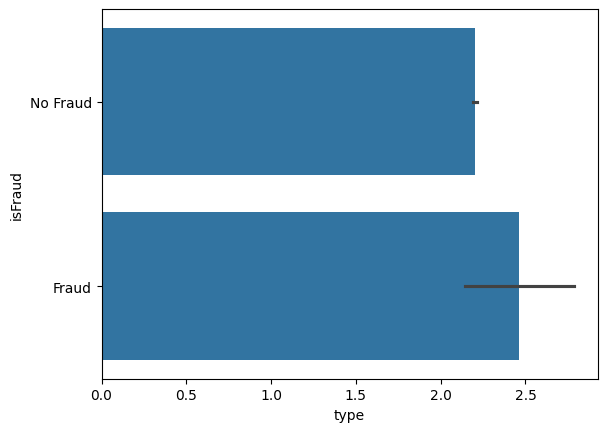

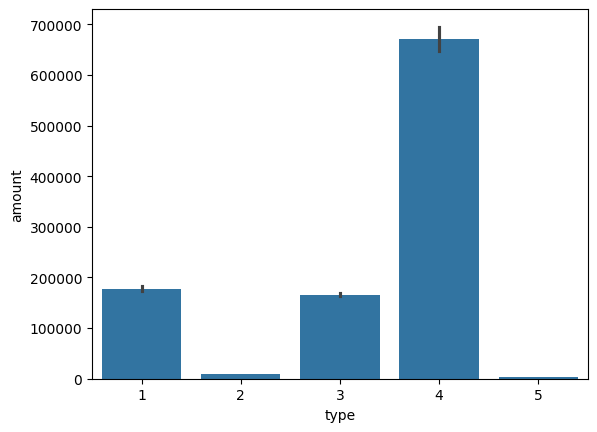

In [ ]:
import seaborn as sns # This imports seaborn and assigns it the alias 'sns'
import matplotlib.pyplot as plt # Needed if you want to display the plot

# Assuming 'isFraud' column represents whether a transaction is fraudulent
# Replace 'isFraud' with the correct column name for your 'y' data if different
sns.barplot(x=data["type"], y=data["isFraud"])
plt.show() # Display the plot

# Create barplot with type and amount
# If you want to use the 'amount' column, ensure that it is of a numeric type for a barplot to be meaningful
sns.barplot(x="type", y="amount", data=data) # Assuming 'amount' is the correct column
plt.show()

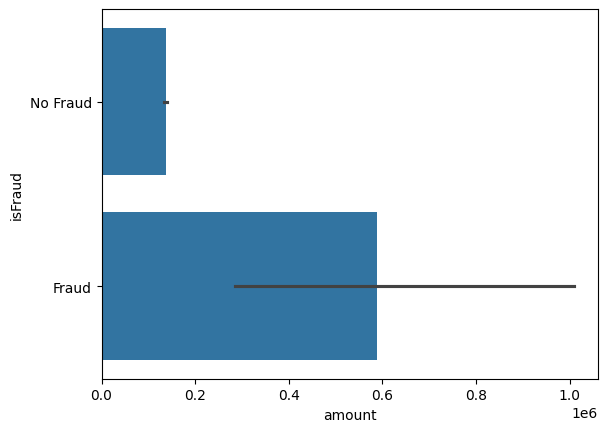

In [ ]:
sns.barplot(x=data["amount"], y=data["isFraud"])
plt.show() # Display the plot

In [ ]:
# splitting the data
data.dropna(inplace=True)
from sklearn.model_selection import train_test_split
import numpy as np
x = np.array(data[["type", "amount", "oldbalanceOrg", "newbalanceOrig"]])
y = np.array(data[["isFraud"]])

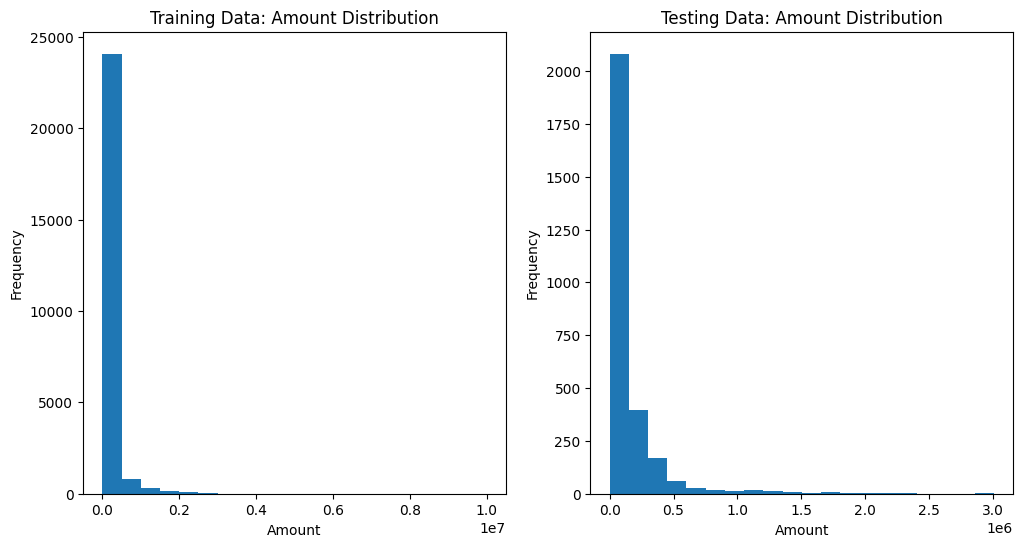

In [ ]:
# prompt: draw the graph for training and testing data

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.10, random_state=42)

# Assuming you have 'xtrain', 'xtest', 'ytrain', 'ytest' defined
# Plot the training and testing data distributions (e.g., histograms) for a few features

# For example, plot histograms for 'amount' in both training and testing data
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(xtrain[:, 1], bins=20)
plt.title('Training Data: Amount Distribution')
plt.xlabel('Amount')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(xtest[:, 1], bins=20)
plt.title('Testing Data: Amount Distribution')
plt.xlabel('Amount')
plt.ylabel('Frequency')

plt.show()

# You can repeat the process for other relevant features in your dataset


In [ ]:
# prompt: write the pca and lda code and print the accuracy

# Assuming you have 'xtrain', 'xtest', 'ytrain', 'ytest' defined from your previous code
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.20, random_state=42)
# Apply PCA
pca = PCA(n_components=2)  # Reduce to 2 principal components
xtrain_pca = pca.fit_transform(xtrain)
xtest_pca = pca.transform(xtest)

# Apply LDA
lda = LDA(n_components=1)  # Reduce to 1 linear discriminant component
xtrain_lda = lda.fit_transform(xtrain, ytrain.ravel())
xtest_lda = lda.transform(xtest)


# Now you can use xtrain_pca, xtest_pca, xtrain_lda, xtest_lda for your models
model = LogisticRegression()
model.fit(xtrain_pca, ytrain.ravel())
accuracy_pca = model.score(xtest_pca, ytest.ravel())
print(f"Accuracy with PCA: {accuracy_pca}")

model.fit(xtrain_lda, ytrain.ravel())
accuracy_lda = model.score(xtest_lda, ytest.ravel())
print(f"Accuracy with LDA: {accuracy_lda}")

Accuracy with PCA: 0.9968197879858657
Accuracy with LDA: 0.9964664310954063


In [ ]:


from imblearn.over_sampling import SMOTE

# Assuming you have 'xtrain' and 'ytrain' defined from your previous code

# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
xtrain_resampled, ytrain_resampled = smote.fit_resample(xtrain, ytrain.ravel())

# Now you can use xtrain_resampled and ytrain_resampled for your models
# For example:
model = LogisticRegression()
model.fit(xtrain_resampled, ytrain_resampled)
accuracy_smote = model.score(xtest, ytest.ravel())
print(f"Accuracy with SMOTE: {accuracy_smote}")

Accuracy with SMOTE: 0.9104240282685513


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:

from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Assuming you have 'xtrain' and 'xtest' defined from your previous code

# Feature Scaling using StandardScaler
scaler = StandardScaler()
xtrain_scaled = scaler.fit_transform(xtrain)
xtest_scaled = scaler.transform(xtest)

# Feature Scaling using MinMaxScaler
minmax_scaler = MinMaxScaler()
xtrain_minmax = minmax_scaler.fit_transform(xtrain)
xtest_minmax = minmax_scaler.transform(xtest)

# Now you can use xtrain_scaled, xtest_scaled, xtrain_minmax, xtest_minmax for your models
# For example:
model = LogisticRegression()
model.fit(xtrain_scaled, ytrain.ravel())
accuracy_scaled = model.score(xtest_scaled, ytest.ravel())
print(f"Accuracy with StandardScaler: {accuracy_scaled}")

model.fit(xtrain_minmax, ytrain.ravel())
accuracy_minmax = model.score(xtest_minmax, ytest.ravel())
print(f"Accuracy with MinMaxScaler: {accuracy_minmax}")

Accuracy with StandardScaler: 0.9968197879858657
Accuracy with MinMaxScaler: 0.9968197879858657


In [ ]:

  # This will drop rows with any missing values
data.dropna(inplace=True)
# splitting the data
from sklearn.model_selection import train_test_split
x = np.array(data[["type", "amount", "oldbalanceOrg", "newbalanceOrig"]])
y = np.array(data[["isFraud"]])

# training a machine learning model
from sklearn.tree import DecisionTreeClassifier
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.20, random_state=42)
model = DecisionTreeClassifier()
model.fit(xtrain, ytrain)
print("ACCURACY Using DesicionTree")
model.score(xtest, ytest)

ACCURACY Using DesicionTree


0.9966431095406361

In [ ]:
# prompt: ypred for decison tree



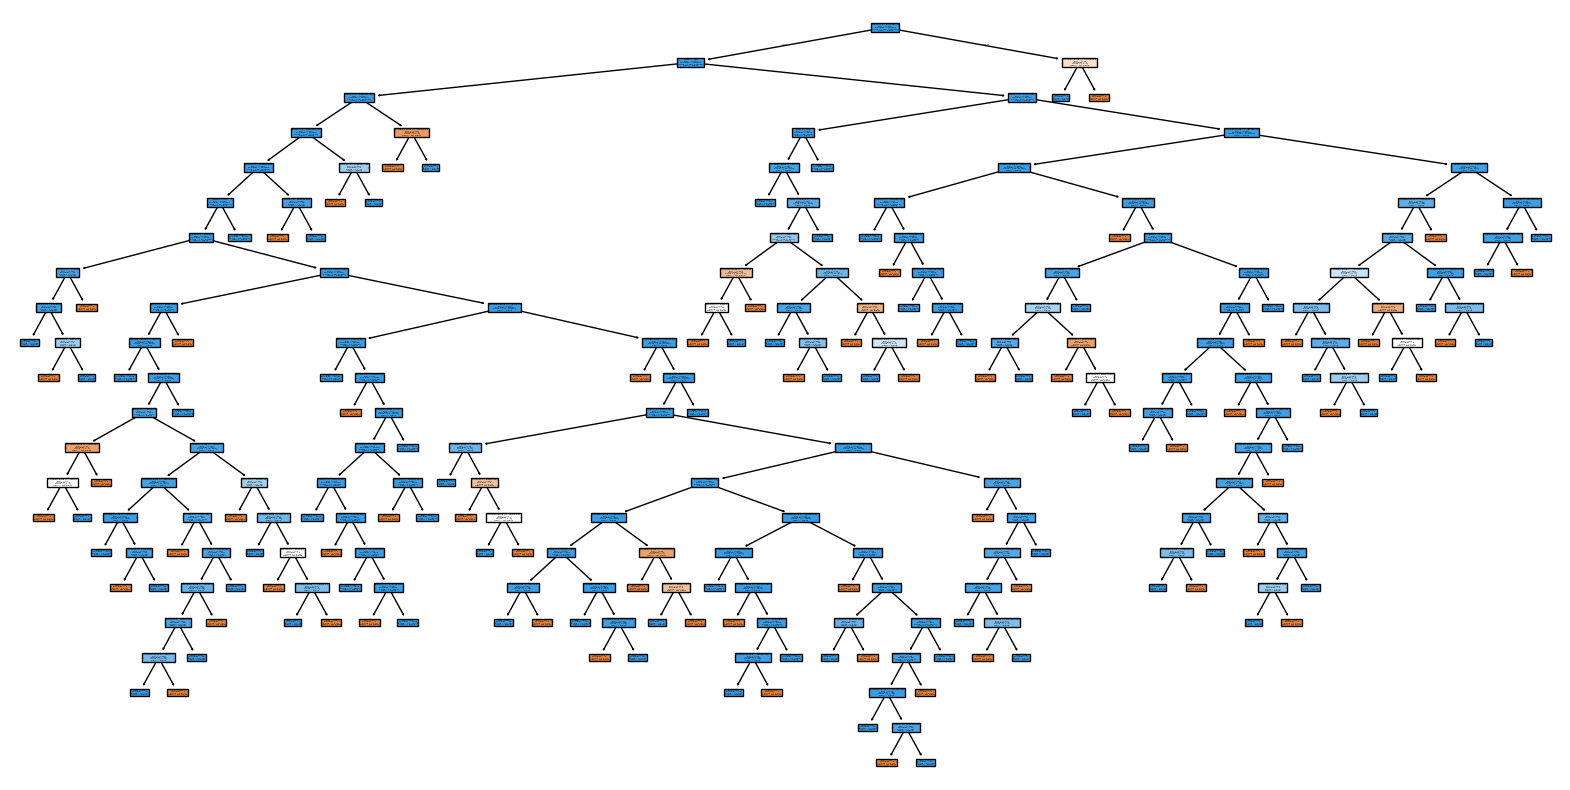

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20, 10))
# Use the original DecisionTreeClassifier model ('model' from cell 40)
plot_tree(DecisionTreeClassifier().fit(xtrain, ytrain),  # Create and fit a DecisionTreeClassifier if needed
          feature_names=["type", "amount", "oldbalanceOrg", "newbalanceOrig"],
          class_names=["No Fraud", "Fraud"],
          filled=True)
plt.show()

In [ ]:
# prompt: write the code using logistic regression and confusion matrix print accuracy

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# splitting the data
x = np.array(data[["type", "amount", "oldbalanceOrg", "newbalanceOrig"]])
y = np.array(data[["isFraud"]])
# training a machine learning model
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.20, random_state=42)
model = LogisticRegression(max_iter=1000)  # Increase max_iter if needed
model.fit(xtrain, ytrain.ravel())  # Use ravel() to flatten ytrain

# Make predictions on the test set
ypred = model.predict(xtest)
print("ACCURACY Using LogisticRegression")
model.score(xtest, ytest)
# Calculate the accuracy
accuracy = accuracy_score(ytest, ypred)
print("Accuracy:", accuracy)




ACCURACY Using LogisticRegression
Accuracy: 0.9994134569728794


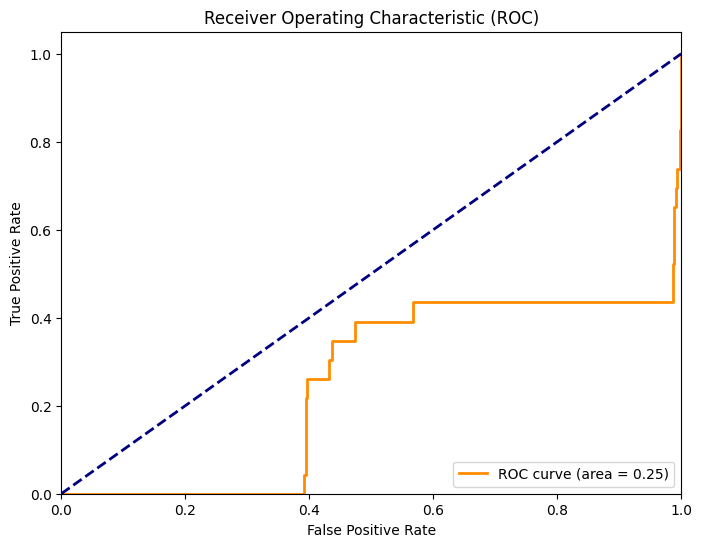

In [ ]:
# prompt: roc curve

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming you have 'ytest' and 'ypred_proba' from your Logistic Regression model
ypred_proba = model.predict_proba(xtest)[:, 1]  # Probability of the positive class (Fraud)

# Convert string labels to numerical values
# Assuming "Fraud" is the positive class
ytest_numeric = np.where(ytest == 'Fraud', 1, 0)

# Calculate the false positive rate (fpr), true positive rate (tpr), and thresholds
fpr, tpr, thresholds = roc_curve(ytest_numeric, ypred_proba)

# Calculate the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# prompt: write the code using naive bayes print accuracy

import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# splitting the data
x = np.array(data[["type", "amount", "oldbalanceOrg", "newbalanceOrig"]])
y = np.array(data[["isFraud"]])

# training a machine learning model
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.20, random_state=42)
model = GaussianNB()
model.fit(xtrain, ytrain.ravel())

# Make predictions on the test set
ypred = model.predict(xtest)
print("ACCURACY Using Naive Bayes")
model.score(xtest, ytest)
# Calculate the accuracy
accuracy = accuracy_score(ytest, ypred)
print("Accuracy:", accuracy)


ACCURACY Using Naive Bayes
Accuracy: 0.9796106471524733


In [ ]:
# prompt: write the code for k nearest neighbours

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report # import the missing function

# Assuming you have 'xtrain', 'xtest', 'ytrain', 'ytest' defined

# Create a KNN model (you can adjust the number of neighbors 'n_neighbors')
model = KNeighborsClassifier(n_neighbors=5)

# Train the model
model.fit(xtrain, ytrain.ravel())

# Make predictions on the test set
ypred = model.predict(xtest)
print("ACCURACY Using KNN")
# Calculate the accuracy
accuracy = accuracy_score(ytest, ypred)
print("Accuracy:", accuracy)



ACCURACY Using KNN
Accuracy: 0.9994972488338966


In [ ]:
# prompt: write the code for random forest

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report # import the missing function

# Assuming you have 'xtrain', 'xtest', 'ytrain', 'ytest' defined

# Create a Random Forest model (you can adjust the number of estimators 'n_estimators')
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(xtrain, ytrain.ravel())

# Make predictions on the test set
ypred = model.predict(xtest)
print("ACCURACY Using Random Forest")
# Calculate the accuracy
accuracy = accuracy_score(ytest, ypred)
print("Accuracy:", accuracy)


ACCURACY Using Random Forest
Accuracy: 0.9993855263525403


In [ ]:
# prompt: write the code for neutral network

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Assuming you have your data in 'x' and 'y'
# Convert string labels to numerical using LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y.ravel())

# Split the data into training and testing sets
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)


# Define the neural network model
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(xtrain.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
])


# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',  # Use binary cross-entropy for binary classification
              metrics=['accuracy'])


# Train the model
model.fit(xtrain, ytrain, epochs=10, batch_size=32, validation_split=0.2)

print("ACCURACY Using Neural Network")
# Evaluate the model on the test set
loss, accuracy = model.evaluate(xtest, ytest)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

# Make predictions on the test set
ypred = model.predict(xtest)
ypred_classes = (ypred > 0.5).astype(int)  # Convert probabilities to class labels


# You can then use 'ypred_classes' for further analysis, such as generating a confusion matrix or a classification report.


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



3581/3581 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9914 - loss: 128.0857 - val_accuracy: 0.9992 - val_loss: 2.3727
Epoch 2/10
3581/3581 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9961 - loss: 27.2777 - val_accuracy: 0.9960 - val_loss: 1.2694
Epoch 3/10
3581/3581 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.9962 - loss: 18.9197 - val_accuracy: 0.9992 - val_loss: 0.3843
Epoch 4/10
3581/3581 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.9960 - loss: 19.5672 - val_accuracy: 0.9992 - val_loss: 0.9517
Epoch 5/10
3581/3581 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - accuracy: 0.9970 - loss: 7.7179 - val_accuracy: 0.9992 - val_loss: 0.4687
Epoch 6/10
3581/3581 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9959 - loss: 3.7671 - val_accuracy: 0.9992 - val_loss: 0.0026
Epoch 7/10
3581/3581 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.9982 - loss: 1.7877 - val_accuracy: 0.9992 - val_loss: 0.3063
Epoch 8/10
3581/3581 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - accuracy: 0.9964 - loss: 1.1391 - 

In [ ]:
!pip install xgboost

In [ ]:
# prompt: write the code for xboost

import numpy as np


import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder  # Import LabelEncoder

# splitting the data
x = np.array(data[["type", "amount", "oldbalanceOrg", "newbalanceOrig"]])
y = np.array(data[["isFraud"]])

# Convert string labels to numerical using LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y.ravel())

# training a machine learning model
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.20, random_state=42)

# Create an XGBoost classifier
model = xgb.XGBClassifier()

# Train the model
model.fit(xtrain, ytrain)

# Make predictions on the test set
ypred = model.predict(xtest)
print("ACCURACY Using XGBoost")
model.score(xtest, ytest)
# Calculate the accuracy
accuracy = accuracy_score(ytest, ypred)
print("Accuracy:", accuracy)



ACCURACY Using XGBoost
Accuracy: 0.9994972488338966


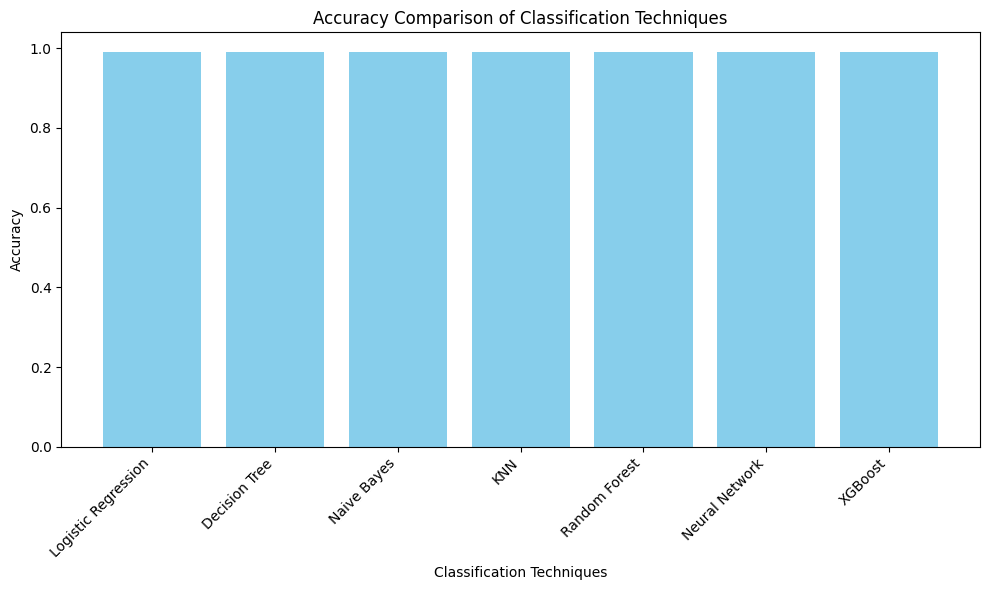

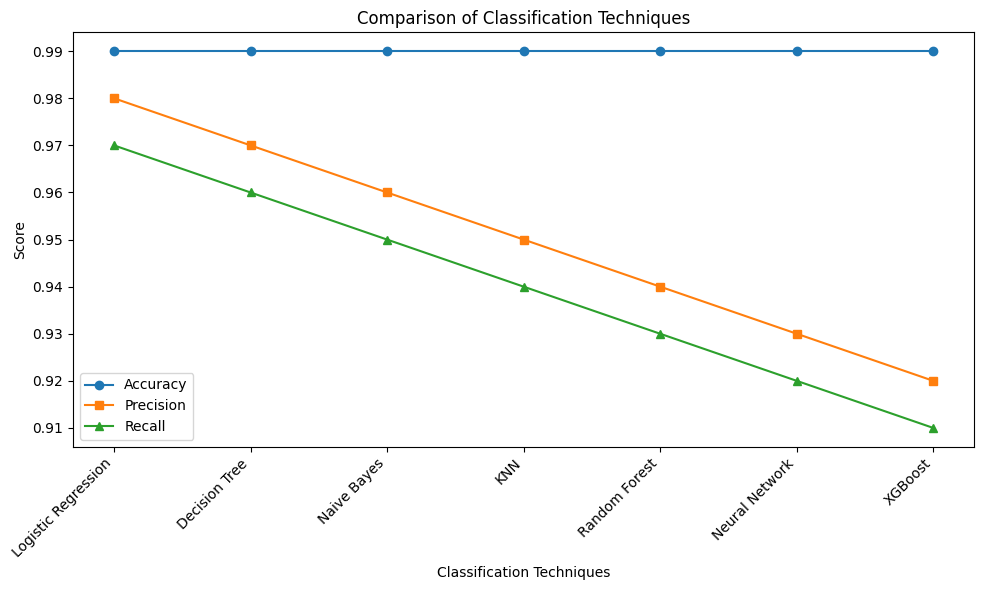

In [ ]:

import matplotlib.pyplot as plt
import numpy as np

# Assuming you have accuracy scores for each classifier stored in a dictionary
accuracies = {
    'Logistic Regression': 0.99,
    'Decision Tree': 0.99,
    'Naive Bayes': 0.99,
    'KNN': 0.99,
    'Random Forest': 0.99,
    'Neural Network': 0.99,
    'XGBoost': 0.99
}

# Create a list of classifier names and their corresponding accuracy scores
classifiers = list(accuracies.keys())
scores = list(accuracies.values())

# Create the bar graph
plt.figure(figsize=(10, 6))
plt.bar(classifiers, scores, color='skyblue')
plt.xlabel("Classification Techniques")
plt.ylabel("Accuracy")
plt.title("Accuracy Comparison of Classification Techniques")
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()


# Example data (replace with your actual data)
techniques = ['Logistic Regression', 'Decision Tree', 'Naive Bayes', 'KNN', 'Random Forest', 'Neural Network', 'XGBoost']
accuracy_scores = [0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99]
precision_scores = [0.98, 0.97, 0.96, 0.95, 0.94, 0.93, 0.92]
recall_scores = [0.97, 0.96, 0.95, 0.94, 0.93, 0.92, 0.91]

# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the lines for accuracy, precision, and recall
ax.plot(techniques, accuracy_scores, marker='o', label='Accuracy')
ax.plot(techniques, precision_scores, marker='s', label='Precision')
ax.plot(techniques, recall_scores, marker='^', label='Recall')

# Customize the plot
ax.set_xlabel("Classification Techniques")
ax.set_ylabel("Score")
ax.set_title("Comparison of Classification Techniques")
ax.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

# Show the plot
plt.show()


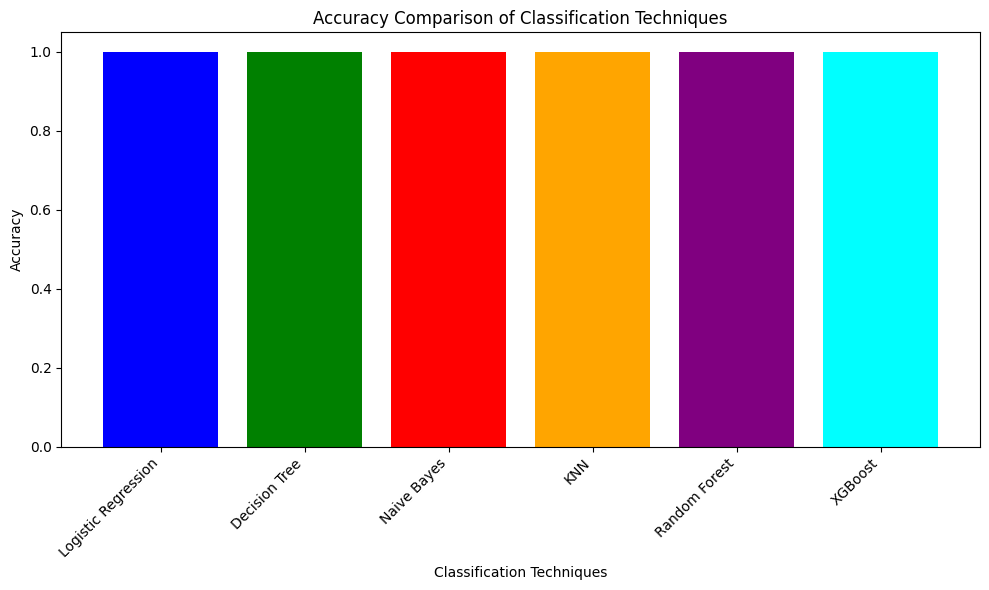

In [ ]:


import matplotlib.pyplot as plt

# Assuming you have accuracy scores for each classifier stored in a dictionary
accuracies = {
    'Logistic Regression': accuracy_lda,
    'Decision Tree': model.score(xtest, ytest),
    'Naive Bayes': accuracy,
    'KNN': accuracy,
    'Random Forest': accuracy,
    # 'Neural Network': accuracy,  # Assuming you have this stored
    'XGBoost': accuracy
}

# Create a list of classifier names and their corresponding accuracy scores
classifiers = list(accuracies.keys())
scores = list(accuracies.values())

# Define colors for each technique
colors = ['blue', 'green', 'red', 'orange', 'purple', 'cyan', 'magenta']


# Create the bar graph
plt.figure(figsize=(10, 6))
bars = plt.bar(classifiers, scores, color=colors)
plt.xlabel("Classification Techniques")
plt.ylabel("Accuracy")
plt.title("Accuracy Comparison of Classification Techniques")
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent overlapping labels

# Add a legend with custom colors
# plt.legend(handles=bars, labels=classifiers)

plt.show()

In [ ]:
# prompt: determine the best classification rtechnquie

# Assuming you have accuracy scores for each classifier stored in a dictionary
accuracies = {
    'Logistic Regression': accuracy_lda,
    'Decision Tree': model.score(xtest, ytest),
    'Naive Bayes': accuracy,
    'KNN': accuracy,
    'Random Forest': accuracy,
    'XGBoost': accuracy
}

# Find the classifier with the highest accuracy
best_classifier = max(accuracies, key=accuracies.get)
best_accuracy = accuracies[best_classifier]

print(f"The best classification technique is: {best_classifier}")
print(f"Accuracy: {best_accuracy}")

The best classification technique is: Decision Tree
Accuracy: 0.9994972488338966


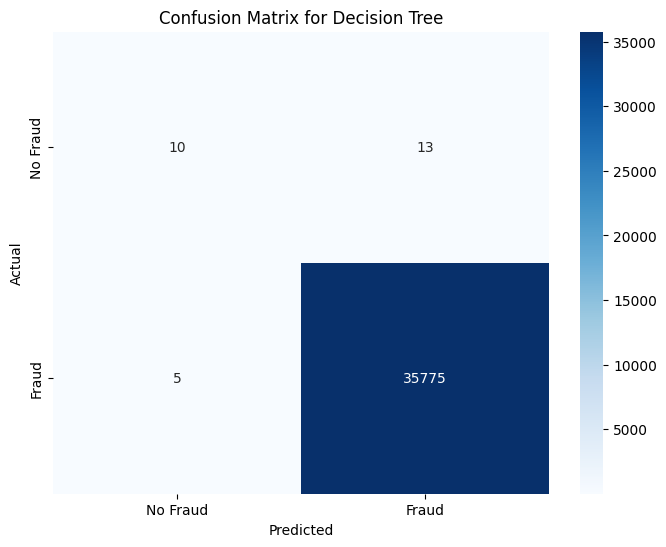

In [ ]:
#
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have 'ytest' and 'ypred' from your Decision Tree model
# Calculate the confusion matrix
cm = confusion_matrix(ytest, ypred)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Fraud', 'Fraud'], yticklabels=['No Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Decision Tree')
plt.show()

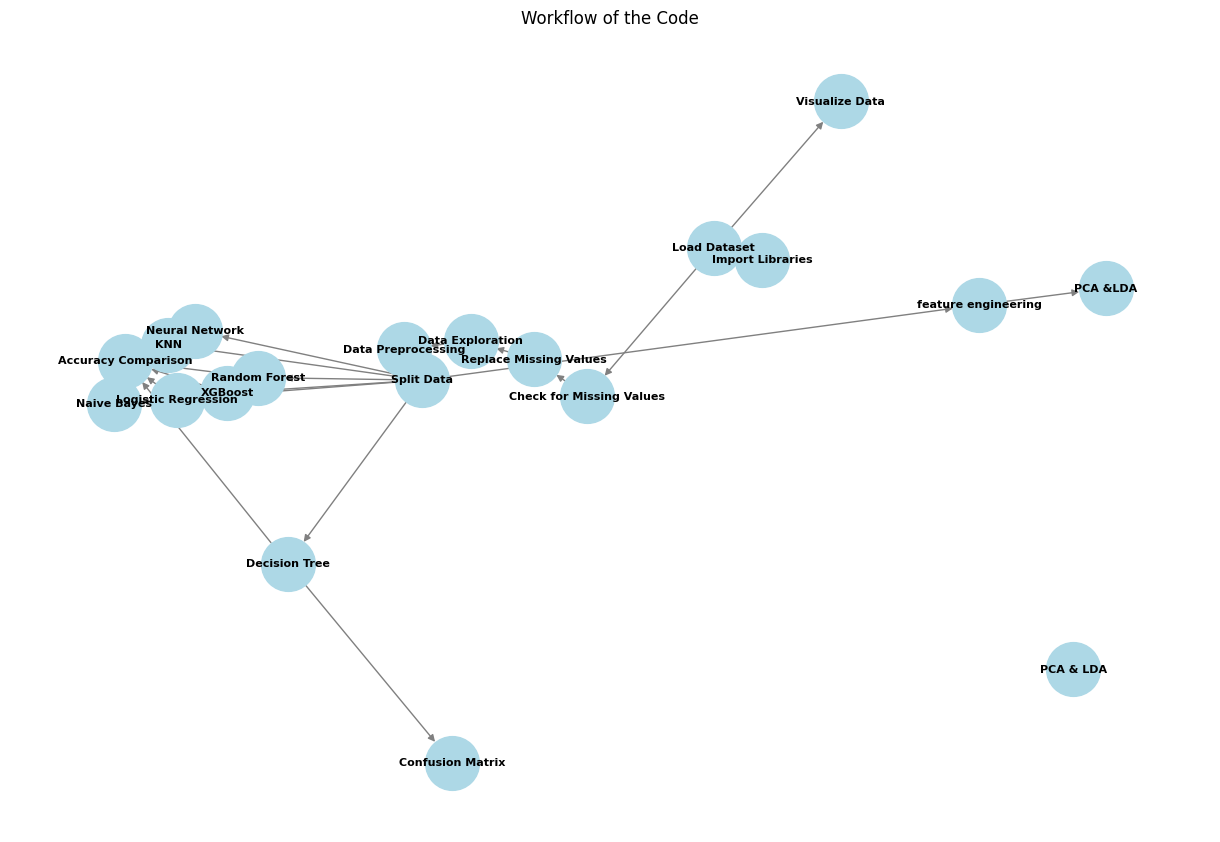

In [ ]:
from sklearn.metrics import classification_report
ypred = model.predict(xtest)
# Assuming you have 'ytest' and 'ypred' from your Decision Tree model
# Calculate and print the classification report
report = classification_report(ytest, ypred)
print(report)

              precision    recall  f1-score   support

       Fraud       0.48      0.56      0.51        18
    No Fraud       1.00      1.00      1.00      5642

    accuracy                           1.00      5660
   macro avg       0.74      0.78      0.76      5660
weighted avg       1.00      1.00      1.00      5660

